In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
file_path = '/content/spotify dataset.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.drop(['track_album_release_date'],axis=1)

# rt track_alb

# Selecting numerical columns for normalization
numerical_cols = [
    'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Verify normalization
print(data_cleaned[numerical_cols].describe())


       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.424771      0.666174      0.698567      0.488588   
std            0.249841      0.147594      0.180942      0.328332   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.240000      0.572737      0.580927      0.181818   
50%            0.450000      0.683622      0.720951      0.545455   
75%            0.620000      0.774161      0.839972      0.818182   
max            1.000000      1.000000      1.000000      1.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean       0.832481      0.565711      0.116632      0.176392   
std        0.062620      0.495671      0.110364      0.220958   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.802066      0.000000      0.044662      

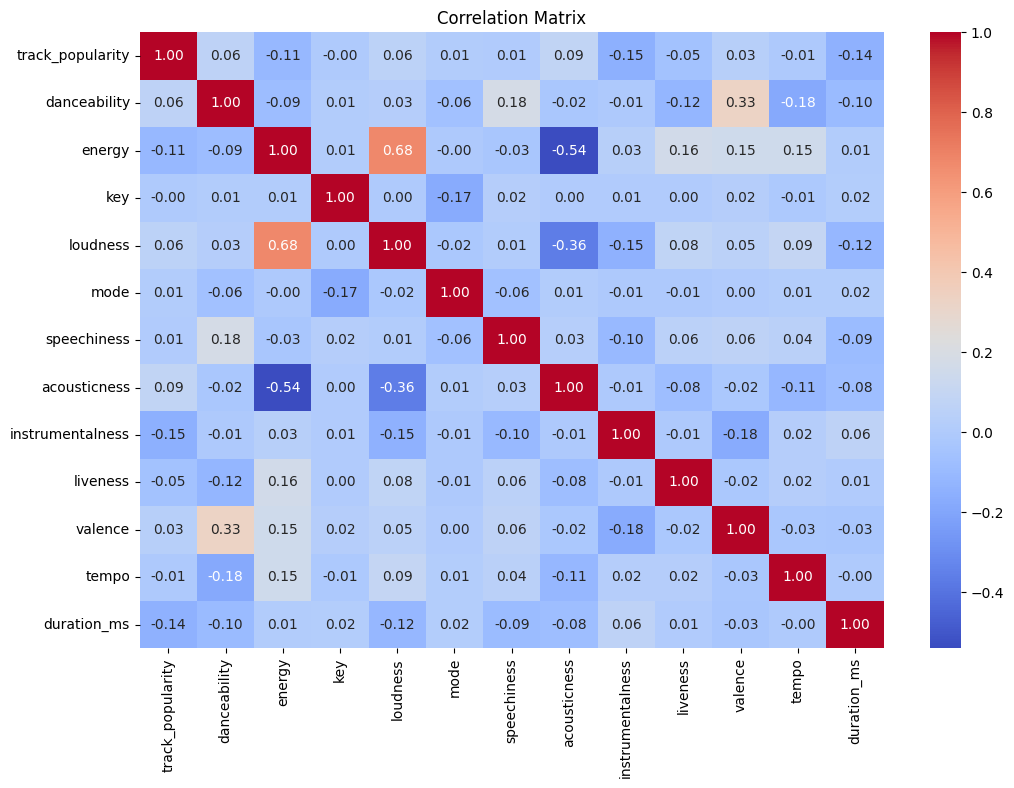

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = data_cleaned[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

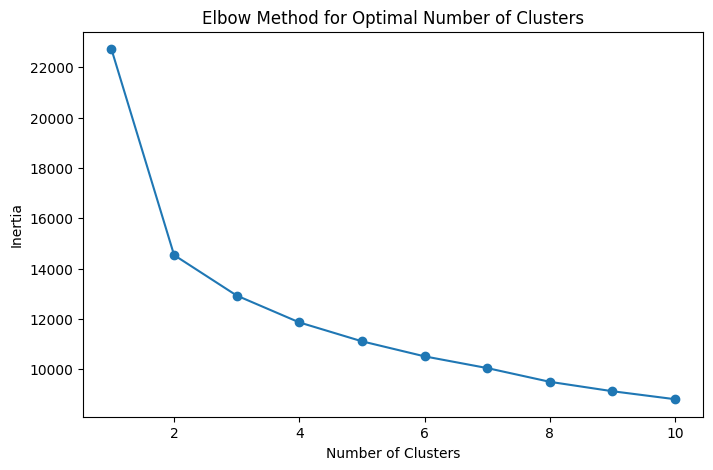

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_cleaned[numerical_cols])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Applying KMeans with the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cleaned['cluster'] = kmeans.fit_predict(data_cleaned[numerical_cols])
cluster_centers = kmeans.cluster_centers_


Iteration 1: difference 0.005149569597460045
Iteration 2: difference 0.0011860504367167965
Iteration 3: difference 0.0006428684233334731
Iteration 4: difference 0.0005725648547351857
Iteration 5: difference 0.00047522372564843293
Iteration 6: difference 0.00034991505232499407
Iteration 7: difference 0.00031960082341109193
Iteration 8: difference 0.00024017845169413442
Iteration 9: difference 0.0002060713848043698
Iteration 10: difference 0.00019161212068218622
Iteration 11: difference 0.00011593323598074868
Iteration 12: difference 8.200606495637725e-05
Iteration 13: difference 5.7381127795804516e-05
Iteration 14: difference 3.9939735359020704e-05
Iteration 15: difference 2.7330172907368725e-05
Iteration 16: difference 2.45344772077574e-05
Iteration 17: difference 1.6305486462229183e-05
Iteration 18: difference 2.5292077190790937e-05
Iteration 19: difference 2.6172540847412696e-05
Iteration 20: difference 3.936871914855401e-05
Iteration 21: difference 1.9205566051598233e-05
Iteration 2

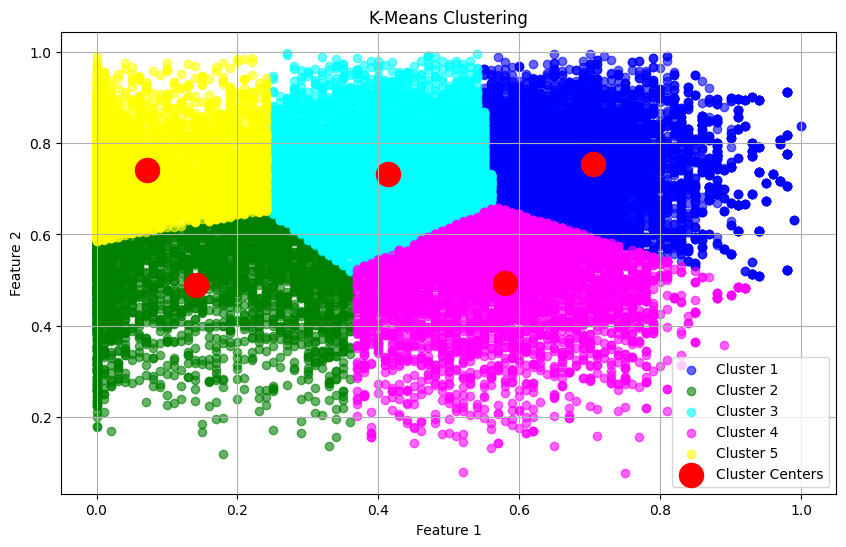

In [34]:
# Apply Min-Max scaling
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Split the data into training and testing sets
x_train, x_test = train_test_split(data_cleaned[numerical_cols], test_size=0.2, random_state=42)

# Convert to DataFrame for easier manipulation
X = pd.DataFrame(x_train, columns=numerical_cols)

# Initialize Centroids
K = 5
Centroids = X.sample(n=K, random_state=42).reset_index(drop=True)

# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
diff = 1
j = 0

while(diff != 0):
    XD = X.copy()
    for i in range(K):
        XD[f'Dist_to_{i}'] = np.sqrt((X.iloc[:, 0] - Centroids.iloc[i, 0])**2 + (X.iloc[:, 1] - Centroids.iloc[i, 1])**2)

    # Assign points to the closest centroid
    X['Cluster'] = XD[[f'Dist_to_{i}' for i in range(K)]].idxmin(axis=1).str.split('_').str[-1].astype(int)

    # Compute new centroids
    Centroids_new = X.groupby('Cluster').mean().reset_index(drop=True)

    # Check for convergence
    if j == 0:
        diff = 1
        j += 1
    else:
        diff = np.sum((Centroids_new - Centroids)**2).sum()
        print(f'Iteration {j}: difference {diff}')
        j += 1

    Centroids = Centroids_new.copy()

# Plotting the clusters using the first two features for simplicity
plt.figure(figsize=(10, 6))

# Define the color map
colors = ['blue', 'green', 'cyan', 'magenta', 'yellow']
for k in range(K):
    data = X[X['Cluster'] == k]
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=colors[k], label=f'Cluster {k+1}', alpha=0.6, marker='o')

# Plot cluster centers
plt.scatter(Centroids.iloc[:, 0], Centroids.iloc[:, 1], c='red', marker='o', s=300, label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [35]:



# Recommendation system
def recommend_songs(song_index, num_recommendations=5):
    cluster_label = X.loc[song_index, 'Cluster']
    recommendations = X[X['Cluster'] == cluster_label].index
    recommendations = [rec for rec in recommendations if rec != song_index]
    return recommendations[:num_recommendations]

# Example usage
song_index = 10  # Index of the song for which we want recommendations
recommended_songs = recommend_songs(song_index)
print(f"Recommended songs for the song at index {song_index}: {recommended_songs}")

# To get the actual song details, you can use the indices to fetch details from the original data
original_data_indices = x_train.index[recommended_songs]
recommended_song_details = data_cleaned.loc[original_data_indices]
print(recommended_song_details)


Recommended songs for the song at index 10: [24845, 21306, 10030, 19024, 20664]
                     track_id                      track_name  track_artist  \
24519  4Oek4Sft4I8s5vHZK6OJnB                Where I Wanna Be  Donell Jones   
20093  3VyjsVV24RmBIbWJAeUJNu                         No Idea   Don Toliver   
22183  1CAALs08dWg3BxFMaaS8qK                      Nonchalant         6LACK   
19053  7BlBVFwvbWvcwNcUarQmjk                Yo x Ti, Tu x Mi       ROSALÍA   
31512  3vfaGivcodZ2Uan3wSr0Jd  All Falls Down - Tritonal Edit      Jus Jack   

       track_popularity          track_album_id          track_album_name  \
24519              0.34  5L5nD7OgxeVH86DQMQb0Pf  The Best of Donell Jones   
20093              0.92  1jAxVdQ2FFtbHu6kLNM0au                   No Idea   
22183              0.03  1JIsPeUpWLoDM6YRW0gQk2                Nonchalant   
19053              0.88  3844bY26oeSkqd06th4EYp          Yo x Ti, Tu x Mi   
31512              0.14  5mseXauNmGD3nKoC3HHDX2            A